In [1]:
%cd lm_tab/scripts

/scratch/lgrinszt/lm_tab/scripts


In [2]:
import pandas as pd
cities = pd.read_csv("../data/cities.csv")

In [3]:
# rename columns
cities = cities.rename(columns={"Official est. GDP\nup to date\n(billion US$)": "gdp", "Metropolitan population": "pop", "Official est. GDP per capita": "gdp_capita",
                                "City proper/metropolitan area": "city", "Country/region": "country"})
cities = cities.drop(columns=["Rank"])

In [4]:
cities

,city,country,gdp,pop,gdp_capita
0,"Abbotsford, British Columbia",Canada,6.141 (2019),"202,497 (2019)","30,321.44"
1,Aberdeen,United Kingdom,23.0 (2020),"489,840 (2020)","46,957.94"
2,Abidjan,Ivory Coast,27 (2017),"5,950,000 (2022)","4,537.82"
3,Abu Dhabi,United Arab Emirates,119 (2015),"1,660,000 (2022)","71,686.75"
4,Adelaide,Australia,64.461 (2018–19),"1,380,000 (2022)","46,710.87"
...,...,...,...,...,...
714,Padua–Treviso–Venice metropolitan area,Italy,34.837 (2020),"2,748,420 (2020)","12,676.37"
715,Verona metropolitan area,Italy,34.152 (2020),"915,975 (2020)","37,282.68"
716,Heidelberg,Germany,34.038 (2020),"1,544,830 (2020)","22,034.79"
717,Murcia,Spain,33.923 (2020),"1,528,828 (2020)","22,186.93"


In [5]:
# Function to clean the data
import numpy as np
def clean_numeric_data(value):
    if isinstance(value, str):
        cleaned_str = value.split('(')[0].replace(',', '').replace(" ", "")
        try:
            return float(cleaned_str)
        except:
            print(f"Could not convert {value}, cleaned_str: {cleaned_str}")
            return np.nan
    return value

# Apply the function to the relevant columns
for col in ['gdp', 'pop', 'gdp_capita']:
    cities[col] = cities[col].apply(clean_numeric_data)

# drop rows with NaN values
cities = cities.dropna()

# Show the cleaned DataFrame
cities

Could not convert 300+,168 (2021), cleaned_str: 300+168
Could not convert 300+,851 (2021), cleaned_str: 300+851
Could not convert 300+,789 (2021), cleaned_str: 300+789


,city,country,gdp,pop,gdp_capita
0,"Abbotsford, British Columbia",Canada,6.141,202497.0,30321.44
1,Aberdeen,United Kingdom,23.000,489840.0,46957.94
2,Abidjan,Ivory Coast,27.000,5950000.0,4537.82
3,Abu Dhabi,United Arab Emirates,119.000,1660000.0,71686.75
4,Adelaide,Australia,64.461,1380000.0,46710.87
...,...,...,...,...,...
713,Ingolstadt,Germany,35.637,197560.0,180400.89
714,Padua–Treviso–Venice metropolitan area,Italy,34.837,2748420.0,12676.37
715,Verona metropolitan area,Italy,34.152,915975.0,37282.68
716,Heidelberg,Germany,34.038,1544830.0,22034.79


In [6]:
cities["name"] = cities["city"] + ", " + cities["country"]
cities["name_sentence"] = cities["city"] + " is a city in " + cities["country"] + "."

/tmp/ipykernel_27811/4036247595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities["name"] = cities["city"] + ", " + cities["country"]
/tmp/ipykernel_27811/4036247595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities["name_sentence"] = cities["city"] + " is a city in " + cities["country"] + "."


In [7]:
cities

,city,country,gdp,pop,gdp_capita,name,name_sentence
0,"Abbotsford, British Columbia",Canada,6.141,202497.0,30321.44,"Abbotsford, British Columbia, Canada","Abbotsford, British Columbia is a city in Canada."
1,Aberdeen,United Kingdom,23.000,489840.0,46957.94,"Aberdeen, United Kingdom",Aberdeen is a city in United Kingdom.
2,Abidjan,Ivory Coast,27.000,5950000.0,4537.82,"Abidjan, Ivory Coast",Abidjan is a city in Ivory Coast.
3,Abu Dhabi,United Arab Emirates,119.000,1660000.0,71686.75,"Abu Dhabi, United Arab Emirates",Abu Dhabi is a city in United Arab Emirates.
4,Adelaide,Australia,64.461,1380000.0,46710.87,"Adelaide, Australia",Adelaide is a city in Australia.
...,...,...,...,...,...,...,...
713,Ingolstadt,Germany,35.637,197560.0,180400.89,"Ingolstadt, Germany",Ingolstadt is a city in Germany.
714,Padua–Treviso–Venice metropolitan area,Italy,34.837,2748420.0,12676.37,"Padua–Treviso–Venice metropolitan area, Italy",Padua–Treviso–Venice metropolitan area is a ci...
715,Verona metropolitan area,Italy,34.152,915975.0,37282.68,"Verona metropolitan area, Italy",Verona metropolitan area is a city in Italy.
716,Heidelberg,Germany,34.038,1544830.0,22034.79,"Heidelberg, Germany",Heidelberg is a city in Germany.


In [115]:
from

SyntaxError: invalid syntax (1763543092.py, line 1)

In [8]:
from src.data_loading import load_data
from skrub import MinHashEncoder
from sklearn.decomposition import PCA
from src.utils import FeaturesExtractor, FixedSizeSplit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from tabpfn import TabPFNClassifier
import pandas as pd
import numpy as np
from tqdm import tqdm
from joblib import Parallel, delayed
import time
from sentence_transformers import SentenceTransformer

from sklearn.base import BaseEstimator, TransformerMixin


In [156]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/name.basics.tsv", sep="\t")
#replace \N with NaN
df = df.replace("\\N", np.nan)
df.dropna(inplace=True)

In [157]:
df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0075213,tt0037382"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0050976"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer","tt0036855,tt0034583,tt0038109,tt0038787"
...,...,...,...,...,...,...
12888718,nm9990009,Francisco Braga,1868,1945,composer,tt8735938
12889433,nm9990804,Gilbert Lascault,1934,2022,writer,"tt12423242,tt2314629,tt2073912,tt12276534"
12890084,nm9991745,Dorothy Dorow,1931,2018,music_department,"tt0179586,tt2265239,tt26921560,tt10250040"
12891428,nm9993435,William Riva,1919,1999,set_decorator,"tt0300836,tt0189339"


# How much different lm embeddings can predict the population?

In [9]:
from src.utils import run_on_encoded_data
from src.encodings import encode
# disable tokenizer parallelism
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [123]:
np.unique(X_text, return_counts=True)

(array(['Aarhus, Denmark', 'Abbotsford, British Columbia, Canada',
        'Aberdeen, United Kingdom', 'Abidjan, Ivory Coast',
        'Abilene, TX MSA, United States',
        'Abu Dhabi, United Arab Emirates', 'Adelaide, Australia',
        'Ahmedabad, India', 'Aix-Marseille-Provence Metropolis, France',
        'Akron, OH MSA, United States', 'Albany, GA MSA, United States',
        'Albany-Lebanon, OR MSA, United States',
        'Albany-Schenectady-Troy, NY MSA, United States',
        'Albuquerque, NM MSA, United States',
        'Alexandria, LA MSA, United States',
        'Alicante metropolitan area, Spain',
        'Allentown-Bethlehem-Easton, PA-NJ MSA, United States',
        'Almaty, Kazakhstan', 'Altoona, PA MSA, United States',
        'Amarillo, TX MSA, United States', 'Ames, IA MSA, United States',
        'Amsterdam metropolitan area, Netherlands',
        'Anchorage, AK MSA, United States', 'Ankara, Turkey',
        'Ann Arbor, MI MSA, United States',
        'Annisto

In [138]:
X_text

0               Abbotsford, British Columbia, Canada
1                           Aberdeen, United Kingdom
2                               Abidjan, Ivory Coast
3                    Abu Dhabi, United Arab Emirates
4                                Adelaide, Australia
                           ...                      
713                              Ingolstadt, Germany
714    Padua–Treviso–Venice metropolitan area, Italy
715                  Verona metropolitan area, Italy
716                              Heidelberg, Germany
717                                    Murcia, Spain
Name: name, Length: 682, dtype: object

In [150]:
encoder.get_feature_names_out()

['aarhus, norwalk, norway']

In [168]:
encoder.get_feature_names_out()

['vyalikova, kríziková, zhukovskaya',
 'pinhão, xinmin, yunupingu',
 'parker, odekerken, jetsy',
 'williams, william, billy',
 'adriana, adrian, dragoljub',
 'immanuel, emmanuel, katzman',
 'aleksander, alexander, aleksandr',
 'clarence, lawrence, malmgren',
 'townsend, david, tüfekçi',
 'charles, françois, carlyle',
 'broxup, buxton, brooke',
 'herbert, alberti, roberti',
 'johnny, scott, johnnie',
 'whipple, dhirubhai, yôjirô',
 'robinson, higginson, robson',
 'raymond, lamond, edmonds',
 'hämäläinen, eugène, neusser',
 'holzki, sjøholm, hollibaugh',
 'gheorghe, george, georgi',
 'barbara, edwards, leonard',
 'böszörményi, kløverfeldt, bángyörgyi',
 'grahame, hammer, marmer',
 'foucaud, pierre, ferrer',
 'stanislawski, mieczyslaw, stanislaw',
 'vladimír, frédéric, vladimir',
 'elizabeth, elisabeth, walther',
 'pellegrini, öllegård, marios',
 'jacques, långbacka, macquoid',
 'sylwester, sylvester, hellsten',
 'novruzov, puzyryov, ruanova']

In [175]:
y

0       202497.0
1       489840.0
2      5950000.0
3      1660000.0
4      1380000.0
         ...    
713     197560.0
714    2748420.0
715     915975.0
716    1544830.0
717    1528828.0
Name: pop, Length: 682, dtype: float64

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from skrub import GapEncoder
from sklearn.linear_model import LinearRegression
# import r2 and mse
from sklearn.metrics import r2_score, mean_squared_error
model = GradientBoostingRegressor()
# 
#X_text = df["primaryName"]#cities["name"]
#y = df["birthYear"]
#y = pd.to_numeric(y)
#y = y > y.median()
X_text = cities["name"]
y = cities["pop"] / 1e6
# shuffle and take 10_000
##indices = np.arange(len(X_text))
#np.random.shuffle(indices)
#X_enc = encode(np.array(X_text).reshape(-1), "lm__all-mpnet-base-v2", dataset_name="pop_cities")
# make a PCA
#pca = PCA(n_components=30)
#X_enc = pca.fit_transform(X_enc)
minhash = MinHashEncoder(n_components=30)
X_enc = minhash.fit_transform(np.array(X_text).reshape(-1, 1))
#X_text = X_text.iloc[indices[:10_000]]
#y = y.iloc[indices[:10_000]]
# shuffle X_enc
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2)
# fit a MinHashEncoder on the training data
#encoder = GapEncoder(n_components=30)
#encoder = GapEncoder(n_components=30)
#encoder = OrdinalEncoder()
model = LinearRegression()
model.fit(X_train, y_train)
# predict on the test data
y_pred = model.predict(X_test)
# calculate r2 and mse
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)



(-0.1602613287644561, 27.83837443232352)

In [65]:
np.unique(y, return_counts=True)

(array([False,  True]), array([341, 341]))

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from tabpfn import TabPFNClassifier
from tabpfn.utils import normalize_data, to_ranking_low_mem, remove_outliers
from tabpfn.utils import NOP, normalize_by_used_features_f
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, RobustScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate
import torch
from skrub import TableVectorizer, MinHashEncoder
def run_on_encoded_data_reg(X_enc, X_rest, y, dim_reduction_name, dim_reduction, model_name, model, encoding,
                        cv, **kwargs):
    """
    X_enc: np array of shape (n_samples, embedding_dim), the embedded texts
    X_rest: np array of shape (n_samples, n_features), additional tabular data
    y: np array of shape (n_samples,), the classifcation target
    dim_reduction_name: str, the name of the dim reduction method
    dim_reduction: sklearn transformer, the dim reduction method
    model_name: str, the name of the model
    model: sklearn model, the model
    encoding: str, the name of the encoding which was used to create X_enc
    cv: sklearn cross validator, the cross validator to use
    """
    #assert model_name in ["TabPFNClassifier", "TabPFNClassifier_basic", "LogisticRegression", "GradientBoostingClassifier"]
    assert encoding.startswith("lm__") or encoding.startswith("skrub__") or encoding.startswith("bert_custom__") or encoding.startswith("openai__") or encoding.startswith("bert_custom_pooling__")
    #TODO: make this cleaner
    # we want to eliminate certain combinations
    # passthrough and lm__ means taking the full lm embedding, which is slow if the model is not LogisticRegression
    # for skrub encodings, we don't want to use passthrough
    if dim_reduction_name == "passthrough" and model_name != "LogisticRegression" and not encoding.startswith("skrub"):
        print("Skipping {} with {} and {}".format(model_name, dim_reduction_name, encoding))
        return None
    if dim_reduction_name != "passthrough" and encoding.startswith("skrub"):
        print("Skipping {} with {} and {}".format(model_name, dim_reduction_name, encoding))
        return None
    print("Running {} with {} and {}".format(model_name, dim_reduction_name, encoding))
    if X_rest is not None:
        # encode X_rest with the TableVectorizer
        if model_name.startswith("TabPFNClassifier"):
            # ordinal encoding for low_cardinality columns
            low_card_cat_transformer = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        else:
            low_card_cat_transformer = OneHotEncoder(handle_unknown="ignore")
        if model_name.startswith("LogisticRegression"):
            numerical_transformer = StandardScaler()
        else:
            numerical_transformer = "passthrough"
        
        rest_trans = TableVectorizer(high_card_cat_transformer = MinHashEncoder(n_components=10),
                                    low_card_cat_transformer = low_card_cat_transformer,
                                    numerical_transformer=numerical_transformer,
                                    cardinality_threshold=10)
    if X_rest is not None and X_enc is not None:
        
        # Assuming X_enc and X_rest are numpy arrays, you can get their shapes
        n_enc_columns = X_enc.shape[1]
        n_rest_columns = X_rest.shape[1]

        # Create column indices for X_enc and X_rest
        enc_indices = np.arange(n_enc_columns)
        rest_indices = np.arange(n_enc_columns, n_enc_columns + n_rest_columns)

        # Create the ColumnTransformer
        complete_trans = ColumnTransformer(
            transformers=[
                ('dim_reduction', dim_reduction, enc_indices),  # Apply dimensionality reduction to X_enc
                ('rest_trans', rest_trans, rest_indices)  # Apply TableVectorizer to X_rest
            ])
        

        full_X = np.concatenate([X_enc, X_rest], axis=1)
        print(X_enc.shape, X_rest.shape, full_X.shape)
        print(complete_trans.fit_transform(full_X).shape)
    elif X_rest is not None:
        complete_trans = rest_trans
        full_X = X_rest
    else:
        complete_trans = dim_reduction
        full_X = X_enc


    pipeline = Pipeline([("encoding", complete_trans), ("model", model)])
    #scores = cross_val_score(pipeline, full_X, y, scoring="accuracy", cv=cv)
    # report both accuracy and roc_auc
    scores = cross_validate(pipeline, full_X, y, scoring=["neg_mean_squared_error", "r2"], cv=cv)
    return {
        'encoding': encoding,
        'dim_reduction': dim_reduction_name,
        'model': model_name,
        **scores,
        'n_train': cv.n_train,
        'n_test': cv.n_test,
        **kwargs
    }


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
encodings = ["lm__all-distilroberta-v1", "lm__all-mpnet-base-v2", "openai__", "skrub__minhash_30"]
#encodings = ["skrub__minhash_1"]
models = {"GradientBoostingClassifier": GradientBoostingRegressor()}
dim_reductions = {#"subset_30": FeaturesExtractor(method="first", n_features=30),
                 # "PCA_5": PCA(n_components=5),
                  "PCA_30": PCA(n_components=30), "passthrough": "passthrough"}
                 #   "PCA_90": PCA(n_components=90),
                    #"subset_90": FeaturesExtractor(method="first", n_features=90),


results_pop = pd.DataFrame(columns=["dataset", "encoding", "dim_reduction", "model", "accuracy", "features"])

cv = FixedSizeSplit(n_splits=10, n_train=580, n_test=100, random_state=42)
#cv = FixedSizeSplit(n_splits=5, n_train=1000, n_test=2000, random_state=42)

dataset = "pop_cities"
#dataset = "actors"
X_text = cities["name"]
y = cities["pop"] / 1e5
#indices = np.arange(len(df))
#rng = np.random.default_rng(42)
#rng.shuffle(indices)
#df = df.iloc[indices]
# take 10000 samples
#actors = df.iloc[:10000]
#X_text = actors["primaryName"]
#y = actors["birthYear"].astype(int)
y = y > y.median()
X_rest = None

for encoding in encodings:
    X_enc = encode(np.array(X_text).reshape(-1), encoding, dataset_name=dataset)
    # # run with joblib
    results_data_enc = Parallel(n_jobs=-1)(delayed(run_on_encoded_data_reg)(X_enc, X_rest, y, dim_reduction_name, dim_reduction,model_name, model, encoding, cv) for (dim_reduction_name, dim_reduction) in dim_reductions.items() for (model_name, model) in models.items())
    for dim_reduction_name, dim_reduction in dim_reductions.items():
        for model_name, model in models.items():
            scores = results_data_enc.pop(0)
            if scores is None:
                continue
            results_pop = pd.concat([results_pop, pd.DataFrame({"dataset": dataset, "encoding": encoding, "dim_reduction": dim_reduction_name, "model": model_name, **scores, "features": "all"})])

results_pop.to_csv("results_pop_reg.csv")

working dir /scratch/lgrinszt/lm_tab/scripts
Loaded from cache


working dir /scratch/lgrinszt/lm_tab/scripts
Loaded from cache
working dir /scratch/lgrinszt/lm_tab/scripts
Loaded from cache
working dir /scratch/lgrinszt/lm_tab/scripts
Loaded from cache


In [17]:
results_pop

,dataset,encoding,dim_reduction,model,accuracy,features,fit_time,score_time,test_neg_mean_squared_error,test_r2,n_train,n_test
0,pop_cities,lm__all-distilroberta-v1,PCA_30,GradientBoostingClassifier,NaN,all,0.753764,0.004522,-0.145792,0.397306,580.0,100.0
1,pop_cities,lm__all-distilroberta-v1,PCA_30,GradientBoostingClassifier,NaN,all,0.727564,0.003545,-0.160929,0.343414,580.0,100.0
2,pop_cities,lm__all-distilroberta-v1,PCA_30,GradientBoostingClassifier,NaN,all,0.739464,0.004662,-0.153874,0.384257,580.0,100.0
3,pop_cities,lm__all-distilroberta-v1,PCA_30,GradientBoostingClassifier,NaN,all,0.733813,0.003137,-0.140066,0.439511,580.0,100.0
4,pop_cities,lm__all-distilroberta-v1,PCA_30,GradientBoostingClassifier,NaN,all,0.732857,0.002805,-0.134251,0.461055,580.0,100.0
5,pop_cities,lm__all-distilroberta-v1,PCA_30,GradientBoostingClassifier,NaN,all,0.745245,0.002825,-0.112165,0.549717,580.0,100.0
6,pop_cities,lm__all-distilroberta-v1,PCA_30,GradientBoostingClassifier,NaN,all,0.741714,0.004231,-0.167654,0.329114,580.0,100.0
7,pop_cities,lm__all-distilroberta-v1,PCA_30,GradientBoostingClassifier,NaN,all,0.737885,0.002717,-0.164744,0.340760,580.0,100.0
8,pop_cities,lm__all-distilroberta-v1,PCA_30,GradientBoostingClassifier,NaN,all,0.729321,0.003387,-0.177024,0.289346,580.0,100.0
9,pop_cities,lm__all-distilroberta-v1,PCA_30,GradientBoostingClassifier,NaN,all,0.716069,0.003236,-0.122770,0.507145,580.0,100.0


In [ ]:
print(2)

In [2]:
%cd lm_tab/scripts

/scratch/lgrinszt/lm_tab/scripts


In [19]:
df_pop

,Unnamed: 0,dataset,encoding,dim_reduction,model,accuracy,features
0,0,pop_cities,lm__all-distilroberta-v1,PCA_5,TabPFNClassifier,0.763333,all
1,1,pop_cities,lm__all-distilroberta-v1,PCA_5,TabPFNClassifier,0.796667,all
2,2,pop_cities,lm__all-distilroberta-v1,PCA_5,TabPFNClassifier,0.793333,all
3,3,pop_cities,lm__all-distilroberta-v1,PCA_5,TabPFNClassifier,0.806667,all
4,4,pop_cities,lm__all-distilroberta-v1,PCA_5,TabPFNClassifier,0.813333,all
...,...,...,...,...,...,...,...
255,0,pop_cities,openai__,passthrough,LogisticRegression,0.756667,all
256,1,pop_cities,openai__,passthrough,LogisticRegression,0.760000,all
257,2,pop_cities,openai__,passthrough,LogisticRegression,0.756667,all
258,3,pop_cities,openai__,passthrough,LogisticRegression,0.756667,all


In [21]:
df

,Unnamed: 0,dataset,encoding,dim_reduction,model,accuracy,features
60,0,pop_cities,lm__all-distilroberta-v1,passthrough,LogisticRegression,0.773333,all
61,1,pop_cities,lm__all-distilroberta-v1,passthrough,LogisticRegression,0.780000,all
62,2,pop_cities,lm__all-distilroberta-v1,passthrough,LogisticRegression,0.793333,all
63,3,pop_cities,lm__all-distilroberta-v1,passthrough,LogisticRegression,0.780000,all
64,4,pop_cities,lm__all-distilroberta-v1,passthrough,LogisticRegression,0.796667,all
125,0,pop_cities,lm__all-mpnet-base-v2,passthrough,LogisticRegression,0.820000,all
126,1,pop_cities,lm__all-mpnet-base-v2,passthrough,LogisticRegression,0.820000,all
127,2,pop_cities,lm__all-mpnet-base-v2,passthrough,LogisticRegression,0.843333,all
128,3,pop_cities,lm__all-mpnet-base-v2,passthrough,LogisticRegression,0.843333,all
129,4,pop_cities,lm__all-mpnet-base-v2,passthrough,LogisticRegression,0.830000,all


In [31]:
pd.isnull(df_actors).sum()

Unnamed: 0       0
dataset          0
encoding         0
dim_reduction    0
model            0
accuracy         0
features         0
dtype: int64

In [4]:
 pd.read_csv("results_pop.csv")["encoding"].unique()

array(['lm__all-distilroberta-v1', 'lm__all-mpnet-base-v2',
       'lm__multi-qa-mpnet-base-dot-v1', 'openai__'], dtype=object)

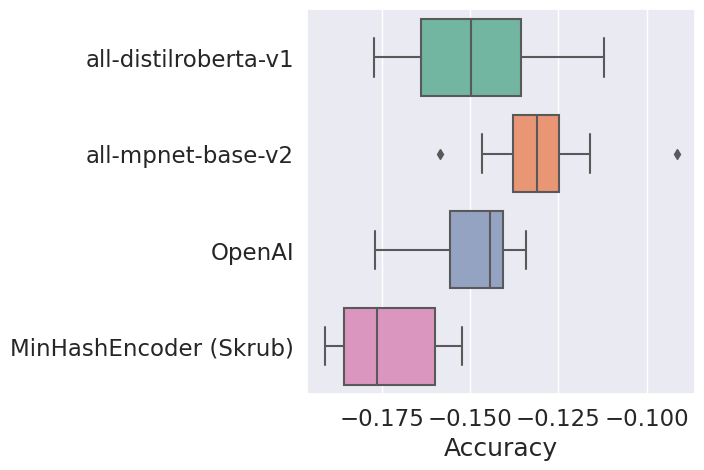

In [22]:
# plot results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

#df = pd.read_csv("results_pop.csv")
#results_new = pd.read_csv("results_pop_openai.csv")
#melted_results = pd.concat([results_old, results_new])
#melted_results = results_pop
#df_actors = pd.read_csv("results_actors.csv")
df = pd.read_csv("results_pop_reg.csv")
#df = pd.concat([df_actors, df_pop])
#df = results_pop
#df = df_po
#df = df[df["model"] == "LogisticRegression"]
#df = df[df["dim_reduction"] == "passthrough"]
#df = df[df["model"] == "LogisticRegression"]
#melted_results = results_pop.groupby(['dataset', 'model', 'dim_reduction', 'encoding', "features"]).mean().reset_index()
# filter encoding
#melted_results = melted_results[melted_results["encoding"] == "lm__all-mpnet-base-v2"]
df['encoding'] = df['encoding'].replace('openai__','OpenAI')
# replace "lm__" by "SentenceTransformer_" as prefix
df['encoding'] = df['encoding'].replace('lm__all-distilroberta-v1', 'all-distilroberta-v1')
df['encoding'] = df['encoding'].replace('lm__all-mpnet-base-v2', 'all-mpnet-base-v2')
df["encoding"] = df["encoding"].replace("skrub__minhash_30", "MinHashEncoder (Skrub)")
# only these encodings
df = df[df['encoding'].isin(['all-distilroberta-v1', 'all-mpnet-base-v2', 'OpenAI', "MinHashEncoder (Skrub)"])]

# # Create the plot
# fig = px.box(
#     data_frame=df,
#     x="accuracy",
#     #color="model",
#     y="encoding",
#     #shape="model",
#     #color="dim_reduction",
#     #hover_data=["model", "dim_reduction", "encoding", "features"],
#     #labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": "Model"},
#     labels={"accuracy": "Accuracy", "encoding": ""},
#     height=600,
#     width=700,
# )
# # bigger font
# fig.update_layout(font=dict(size=20))
# # vertical line for random guessing
# fig.add_vline(x=0.5, line_width=3, line_dash="dash", line_color="black")
# # start x at 0.5
# fig.update_xaxes(range=[0.45, 0.90])
# fig.show()

# use seaborn
sns.set_theme(style="whitegrid")
# layout paper
sns.set_context("paper")
sns.set(font_scale=1.5)

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="test_neg_mean_squared_error", y="encoding", data=df, ax=ax, palette="Set2")
# bigger font
# scale 1.5
ax.set_xlabel("Accuracy")
ax.set_ylabel("")
# vertical line for random guessing
#ax.axvline(x=0.5, linestyle="--", color="black")

# save plot
fig.savefig("../figures/results_pop.pdf", bbox_inches='tight')
# save plot
#fig.write_image("../figures/results_pop_pred.pdf")

In [16]:
# plot results
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#results_old = pd.read_csv("results_pop.csv")
#results_new = pd.read_csv("results_pop_openai.csv")
#melted_results = pd.concat([results_old, results_new])
#melted_results = results_pop
df_sentences = pd.read_csv("results_pop_sentence.csv")
df_no_sentences = pd.read_csv("results_pop.csv")
df_sentences["sentences"] = True
df_no_sentences["sentences"] = False
melted_results = pd.concat([df_sentences, df_no_sentences])
#melted_results = results_pop.groupby(['dataset', 'model', 'dim_reduction', 'encoding', "features"]).mean().reset_index()
print(len(melted_results))
# filter encoding
#melted_results = melted_results[melted_results["encoding"] == "lm__all-mpnet-base-v2"]

# Create the plot
fig = px.strip(
    data_frame=melted_results,
    x="accuracy",
    y="features",
    #color="model",
    color="sentences",
    #shape="model",
    facet_row="model",
    #color="dim_reduction",
    hover_data=["model", "dim_reduction", "encoding", "features", "sentences"],
    title="Swarm Plot of Model Accuracies Across Datasets",
    labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": "Model"},
    height=700,
    width=900,
)
fig.show()        

520


Running TabPFNClassifier with PCA_30 and lm__all-distilroberta-v1
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Skipping GradientBoostingClassifier with passthrough and lm__all-mpnet-base-v2
Running LogisticRegression with PCA_30 and lm__multi-qa-mpnet-base-dot-v1
Running LogisticRegression with PCA_5 and openai__
Running TabPFNClassifier with PCA_5 and lm__all-mpnet-base-v2
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Loading mo

# Combining embeddings and numerical values

In [30]:
def generate_toy_problem(df, problem_type="matching"):
    cities = df.copy()
    if problem_type == "capita":
        cities["per_capita"] = np.random.uniform(0, 1, len(cities))
        cities["num"] = cities["pop"] * cities["per_capita"]
        X_rest = cities[["per_capita"]]
        X_rest_with_pop = cities[["per_capita", "pop"]]
        X_text = cities[["name"]]
        y = cities["num"] > np.median(cities["num"])
    elif problem_type == "matching":
        pop_shufled = cities["pop"].sample(frac=1).values
        choices = np.random.choice([0, 1], size=len(cities), p=[0.5, 0.5])
        # Based on the choices, create the 'new_pop' column
        cities['new_pop'] = np.where(choices == 0, cities['pop'], pop_shufled)
        # Store the choices as 'y'
        y = choices
        #X_rest = cities.drop(columns=["name", "city", "country", "gdp"])
        X_rest = cities[["new_pop"]]
        X_rest_with_pop = cities[["new_pop", "pop"]]
        X_text = cities[["name"]]
    else:
        raise ValueError(f"problem_type {problem_type} not supported")
    return X_rest, X_rest_with_pop, X_text, y

In [ ]:
# create datasets
for i in tqdm(range(5)):
    X_rest, X_rest_with_pop, X_text, y = generate_toy_problem(cities, problem_type="matching")
    # create a dataframe which is the concatenation of the text and the rest, with "name" for the text column
    

In [20]:
df["pop"] = df["birthYear"]

In [21]:
df["name"] = df["primaryName"]

In [31]:
from skrub import TableVectorizer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tabpfn import TabPFNClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from src.utils import FeaturesExtractor, FixedSizeSplit
from tqdm import tqdm
from src.encodings import encode


models = {"TabPFNClassifier": TabPFNClassifier(device="cpu"), "GradientBoostingClassifier": GradientBoostingClassifier(), "LogisticRegression": LogisticRegression()}
dim_reductions = {#"subset_30": FeaturesExtractor(method="first", n_features=30),
                  #"PCA_5": PCA(n_components=5),
                  "PCA_30": PCA(n_components=30),}
                  #"subset_30": FeaturesExtractor(method="first", n_features=30),
                  #"subset_5": FeaturesExtractor(method="first", n_features=50)}}
                  #                    "passthrough": "passthrough"}

cv = FixedSizeSplit(n_splits=5, n_train=1000, n_test=2000, random_state=42)


results = pd.DataFrame(columns=["dataset", "encoding", "dim_reduction", "model", "accuracy"])

dataset = "actors"
#encoding = "lm__all-distilroberta-v1"
encoding = "lm__all-mpnet-base-v2"
#X_text = df["name"]

for i in tqdm(range(5)):
    X_rest, X_rest_with_pop, X_text, y = generate_toy_problem(df, problem_type="matching")
    # duplicate X_rest 3 times # to give more weight to the rest features
    # X_rest_copy = X_rest.copy()
    # X_rest_copy.columns = [f"{col}_2" for col in X_rest_copy.columns]
    # X_rest_copy_2 = X_rest.copy()
    # X_rest_copy_2.columns = [f"{col}_3" for col in X_rest_copy_2.columns]
    # X_rest = pd.concat([X_rest, X_rest_copy, X_rest_copy_2], axis=1)
    # # same for X_rest_with_pop
    # X_rest_copy = X_rest_with_pop.copy()
    # X_rest_copy.columns = [f"{col}_2" for col in X_rest_copy.columns]
    # X_rest_copy_2 = X_rest_with_pop.copy()
    # X_rest_copy_2.columns = [f"{col}_3" for col in X_rest_copy_2.columns]
    # X_rest_with_pop = pd.concat([X_rest_with_pop, X_rest_copy, X_rest_copy_2], axis=1)
    X_enc = encode(np.array(X_text).reshape(-1), encoding)




    # # run with joblib
    results_data_enc = Parallel(n_jobs=-1)(delayed(run_on_encoded_data)(X_enc, X_rest, y, dim_reduction_name, dim_reduction,model_name, model, encoding, cv) for (dim_reduction_name, dim_reduction) in dim_reductions.items() for (model_name, model) in models.items())
    for dim_reduction_name, dim_reduction in dim_reductions.items():
        for model_name, model in models.items():
            scores = results_data_enc.pop(0)
            if scores is None:
                continue
            results = pd.concat([results, pd.DataFrame({"dataset": dataset, "encoding": encoding, "dim_reduction": dim_reduction_name, "model": model_name, "accuracy": scores, "features": "all"})])

    # # same with X_rest = None
    results_data_enc = Parallel(n_jobs=-1)(delayed(run_on_encoded_data)(X_enc, None, y, dim_reduction_name, dim_reduction,model_name, model, encoding, cv) for (dim_reduction_name, dim_reduction) in dim_reductions.items() for (model_name, model) in models.items())
    for dim_reduction_name, dim_reduction in dim_reductions.items():
        for model_name, model in models.items():
            scores = results_data_enc.pop(0)
            if scores is None:
                continue
            results = pd.concat([results, pd.DataFrame({"dataset": dataset, "encoding": encoding, "dim_reduction": dim_reduction_name, "model": model_name, "accuracy": scores, "features": "text_only"})])

    results_data_enc = Parallel(n_jobs=-1)(delayed(run_on_encoded_data)(None, X_rest, y, dim_reduction_name, dim_reduction,model_name, model, encoding, cv) for (dim_reduction_name, dim_reduction) in dim_reductions.items() for (model_name, model) in models.items())
    for dim_reduction_name, dim_reduction in dim_reductions.items():
        for model_name, model in models.items():
            scores = results_data_enc.pop(0)
            if scores is None:
                continue
            results = pd.concat([results, pd.DataFrame({"dataset": dataset, "encoding": encoding, "dim_reduction": dim_reduction_name, "model": model_name, "accuracy": scores, "features": "rest_only"})])

    # add pop to X_rest
    results_data_enc = Parallel(n_jobs=-1)(delayed(run_on_encoded_data)(X_enc, X_rest_with_pop, y, dim_reduction_name, dim_reduction,model_name, model, encoding, cv) for (dim_reduction_name, dim_reduction) in dim_reductions.items() for (model_name, model) in models.items())
    for dim_reduction_name, dim_reduction in dim_reductions.items():
        for model_name, model in models.items():
            scores = results_data_enc.pop(0)
            if scores is None:
                continue
            results = pd.concat([results, pd.DataFrame({"dataset": dataset, "encoding": encoding, "dim_reduction": dim_reduction_name, "model": model_name, "accuracy": scores, "features": "all_plus_pop"})])
    
    # all rest + pop
    X_enc_none = None
    results_data_enc = Parallel(n_jobs=-1)(delayed(run_on_encoded_data)(None, X_rest_with_pop, y, dim_reduction_name, dim_reduction,model_name, model, encoding, cv) for (dim_reduction_name, dim_reduction) in dim_reductions.items() for (model_name, model) in models.items())
    for dim_reduction_name, dim_reduction in dim_reductions.items():
        for model_name, model in models.items():
            scores = results_data_enc.pop(0)
            if scores is None:
                continue
            results = pd.concat([results, pd.DataFrame({"dataset": dataset, "encoding": encoding, "dim_reduction": dim_reduction_name, "model": model_name, "accuracy": scores, "features": "rest_plus_pop"})])



Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


  0%|          | 0/5 [00:00<?, ?it/s]

working dir /scratch/lgrinszt/lm_tab/scripts


  0%|          | 0/5 [03:29<?, ?it/s]


KeyboardInterrupt: 

In [12]:
# save results
#results.to_csv(f"../results/results_toy_capita.csv", index=False)

375


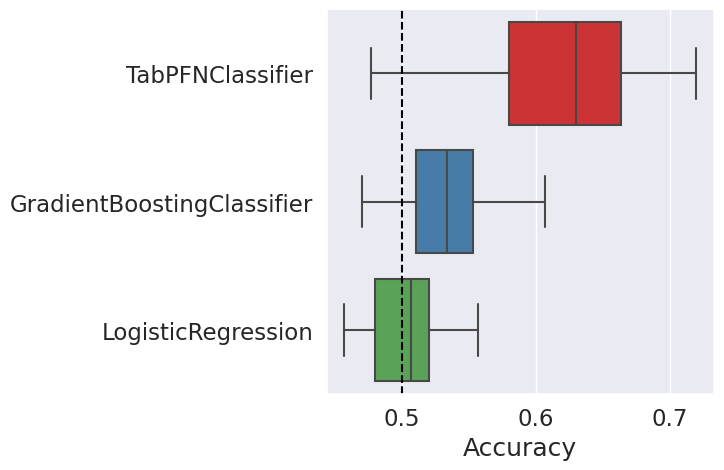

In [84]:
# plot results
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

results = pd.read_csv(f"../results/results_toy_matching.csv")
#melted_results = results.groupby(['dataset', 'model', 'dim_reduction', 'encoding', "features"]).mean().reset_index()
melted_results = results
#melted_results = results
#melted_results = results.explode('accuracy')
#melted_results['accuracy'] = melted_results['accuracy'].astype(float)
#melted_results = melted_results[melted_results['encoding'] == 'lm__all-MiniLM-L12-v2']
print(len(melted_results))
melted_results = melted_results[melted_results["features"] == "all"]


# # Create the plot
# fig = px.box(
#     data_frame=melted_results,
#     x="accuracy",
#     y="model",
#     #color="dim_reduction",
#     hover_data=["model", "dim_reduction", "encoding"],
#     title="",
#     labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": ""},
#     height=600,
#     width=700,
# )
# # biger font
# fig.update_layout(font=dict(size=20))

# # vertical line for random guessing
# fig.add_vline(x=0.5, line_width=3, line_dash="dash", line_color="black")
# fig.show()  

# use seaborn
sns.set_theme(style="whitegrid")
# layout paper
sns.set_context("paper")
# bigger font (20)
# set font to 20
sns.set(font_scale=1.5)
# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.boxplot(x="accuracy", y="model", data=melted_results, ax=ax, palette="Set1")
ax.set(xlabel="Accuracy", ylabel="")
ax.set_title("")

# vertical line for random guessing
ax.axvline(x=0.5, linestyle='--', color="black")

# save plot as pdf
plt.savefig("../figures/results_toy_matching.pdf", bbox_inches='tight')



# save plot
#fig.write_image("../figures/results_toy_matching.pdf")

In [17]:
# plot results
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


melted_results = results.groupby(['dataset', 'model', 'dim_reduction', 'encoding', "features"]).mean().reset_index()
#melted_results = results
#melted_results = results.explode('accuracy')
#melted_results['accuracy'] = melted_results['accuracy'].astype(float)
#melted_results = melted_results[melted_results['encoding'] == 'lm__all-MiniLM-L12-v2']
print(len(melted_results))


# Create the plot
fig = px.strip(
    data_frame=melted_results,
    x="accuracy",
    y="features",
    color="model",
    #color="dim_reduction",
    hover_data=["model", "dim_reduction", "encoding"],
    title="Swarm Plot of Model Accuracies Across Datasets",
    labels={"accuracy": "Accuracy", "dataset": "Dataset", "model": "Model"},
    height=600,
    width=900,
)
fig.show()        

15


In [ ]:
results

,dataset,encoding,dim_reduction,model,accuracy,features
0,pop,lm__all-distilroberta-v1,PCA_10,TabPFNClassifier,0.666667,all
1,pop,lm__all-distilroberta-v1,PCA_10,TabPFNClassifier,0.646667,all
2,pop,lm__all-distilroberta-v1,PCA_10,TabPFNClassifier,0.636667,all
3,pop,lm__all-distilroberta-v1,PCA_10,TabPFNClassifier,0.576667,all
4,pop,lm__all-distilroberta-v1,PCA_10,TabPFNClassifier,0.636667,all
...,...,...,...,...,...,...
0,pop,lm__all-distilroberta-v1,PCA_10,LogisticRegression,0.366667,rest_plus_pop
1,pop,lm__all-distilroberta-v1,PCA_10,LogisticRegression,0.356667,rest_plus_pop
2,pop,lm__all-distilroberta-v1,PCA_10,LogisticRegression,0.486667,rest_plus_pop
3,pop,lm__all-distilroberta-v1,PCA_10,LogisticRegression,0.483333,rest_plus_pop


In [3]:
%cd lm_tab/scripts

/scratch/lgrinszt/lm_tab/scripts


In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/name.basics.tsv", sep="\t")
#replace \N with NaN
df = df.replace("\\N", np.nan)
df.dropna(inplace=True)

In [7]:
df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0075213,tt0037382"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0050976"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer","tt0036855,tt0034583,tt0038109,tt0038787"
...,...,...,...,...,...,...
12888718,nm9990009,Francisco Braga,1868,1945,composer,tt8735938
12889433,nm9990804,Gilbert Lascault,1934,2022,writer,"tt12423242,tt2314629,tt2073912,tt12276534"
12890084,nm9991745,Dorothy Dorow,1931,2018,music_department,"tt0179586,tt2265239,tt26921560,tt10250040"
12891428,nm9993435,William Riva,1919,1999,set_decorator,"tt0300836,tt0189339"


In [42]:
actors = df

In [43]:
actors

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0075213,tt0037382"
2,nm0000003,Brigitte Bardot,1934,NaN,"actress,soundtrack,music_department","tt0057345,tt0056404,tt0054452,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0050976"
...,...,...,...,...,...,...
12891677,nm9993714,Romeo del Rosario,NaN,NaN,"animation_department,art_department","tt11657662,tt2455546,tt14069590"
12891678,nm9993716,Essias Loberg,NaN,NaN,NaN,NaN
12891679,nm9993717,Harikrishnan Rajan,NaN,NaN,cinematographer,tt8736744
12891680,nm9993718,Aayush Nair,NaN,NaN,cinematographer,tt8736744
